In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
import openpyxl as px

In [2]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Don’t wrap columns

In [3]:
wb = px.load_workbook("AMERICA DO NORTE_jan26.xlsx")
sheet = wb["Sheet1"]

def cleaning_smile(Data): 
    df = pd.DataFrame(Data)
    for col in Data.columns: 
        if col.startswith("smile_") or col.startswith("income_"):
            cleaned_col = col.split(" ")[0]
            df = df.rename(columns={col : cleaned_col})
    return df

binary = {0 : 0, 1 : 0, 2 : 0, 3 : 1}

data= pd.read_excel("AMERICA DO NORTE_jan26.xlsx", sheet_name='Sheet1')
df = cleaning_smile(data)

df['GAD7_SEVERIDADE SINTOMAS']=df["GAD7_SEVERIDADE SINTOMAS"].map(binary)
severe_gad7_indexes = df[df['GAD7_SEVERIDADE SINTOMAS'] == 1].index.tolist()
df=df.drop(columns=['GAD7_SEVERIDADE SINTOMAS'])

sexual_dicotomico_indexes = df[df['SEXUAL DICOTOMICO '] == 1].index.tolist()
gender_dicotomico_indexes = df[df['GENDER DICOTOMICO '] == 1].index.tolist()

In [4]:
def clean_smile_column_suffix(col_name):
    if col_name.startswith("smile_"):
        parts = col_name.split("_")
        if len(parts) >= 3:
            return "_".join(parts[:2])  # Keep only smile and number
    return col_name
df=df.drop(columns=['global_id','CONTINENT_CODE_INT', "country_code", "GENDER DICOTOMICO ", "SEXUAL DICOTOMICO ", 
            "bmi", "SMILE", "INCOME PERCENTILE", "ethnic_group_1",	"us_ethnic_group",	"ethnic_group_2"])
df=df.drop(columns=['score_food_smile', 'score_subs_smile', 'score_PA_smile', 'score_stress_smile', 
           'score_sleep_smile', 'score_social_smile', 'score_envir_smile', 'scoretot_smile'])

map = {"RAÇA/ETNIA DICOTOMICA" : "race/ethnicity"}

df.columns = df.columns.map(clean_smile_column_suffix)
df = df.rename(columns=map)
df.describe()

,age,SEXO,gender_identity,sexual_orientation,race/ethnicity,bmi_classificação,marital_status,student_accommodation,work,INCOME CLASSIFICAÇÃO,smile_2,smile_3,smile_5,smile_8,smile_9,smile_10,smile_11,smile_12,smile_13,smile_15,smile_17,smile_19,smile_25,smile_27,smile_28,smile_30,smile_31,smile_32,smile_34,smile_37,smile_40,smile_41,smile_42,smile_43,sedentary_behavior 1,sedentary_behavior 2,GAD7_class Ansiedade
count,915.000000,913.000000,908.000000,911.000000,909.000000,905.000000,912.000000,908.000000,912.000000,754.000000,913.000000,913.000000,910.000000,914.000000,914.000000,912.000000,906.000000,912.000000,909.000000,913.000000,914.000000,914.000000,914.000000,912.00000,913.000000,914.000000,914.000000,913.000000,915.000000,914.000000,915.000000,915.000000,915.000000,914.000000,915.000000,915.000000,915.000000
mean,18.522404,0.686747,1.035242,1.376509,0.673267,1.537017,2.082237,1.747797,1.869518,3.001326,2.131435,2.557503,3.328571,3.396061,3.582057,3.861842,3.983444,2.883772,2.200220,3.415115,2.107221,2.587527,2.526258,2.37500,2.410734,3.507659,3.304158,3.258488,3.342077,3.602845,2.314754,1.660109,2.610929,2.884026,2.982514,2.177049,0.208743
std,1.189069,0.464071,0.250407,0.942208,0.469277,0.924716,0.503372,0.434516,0.337018,1.455401,0.930848,0.648236,0.658996,0.697850,0.760718,0.427630,0.136052,0.928675,1.107424,0.760649,0.984820,1.170792,0.829277,0.78944,0.847452,0.645522,0.815676,0.881708,0.836745,0.603778,0.864667,0.743531,0.793498,0.909790,0.925992,1.080622,0.406633
min,16.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,2.00000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
75%,19.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,0.000000
max,33.000000,1.000000,3.000000,5.000000,1.000000,3.000000,5.000000,2.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,1.000000


In [5]:
X = df.drop(columns=['GAD7_class Ansiedade'])
y = df["GAD7_class Ansiedade"]

valid_mask = y.notna()
X = X.loc[valid_mask]
y = y.loc[valid_mask]

if y.isna().any():
    raise ValueError("y contains NaN values after filtering.")

data_idx = X.index.to_numpy()

In [6]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline

shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=50)
splits = []

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'race/ethnicity', 'student_accommodation', 'work']  

num = ['age', 'bmi_classificação', 'INCOME CLASSIFICAÇÃO', 'sedentary_behavior 1', 'sedentary_behavior 2', 'smile_2','smile_3', 
       'smile_5', 'smile_8', 'smile_9', 'smile_10', 'smile_11', 'smile_12', 'smile_13', 'smile_15', 
       'smile_17', 'smile_19', 'smile_25', 'smile_27', 'smile_28', 'smile_30', 'smile_31', 'smile_32', 
       'smile_34', 'smile_37', 'smile_40', 'smile_41', 'smile_42', 'smile_43']

# Pipeline for categorical: impute first, then one-hot encode
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Pipeline for numerical: impute first, then scale
numerical_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=1)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_pipeline, one_hotted),
        ("num", numerical_pipeline, num),
    ],
    remainder="passthrough"
)

for train_pos, test_pos in shuffle_split.split(data_idx):
    train_idx = data_idx[train_pos]
    test_idx = data_idx[test_pos]

    X_train, X_test_og = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test_og)
    
    # Get feature names from the preprocessor
    onehot_encoder = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    onehot_names = onehot_encoder.get_feature_names_out(one_hotted)
    scaled_names = num
    remaining = [col for col in X_train.columns if col not in one_hotted + num]

    all_feature_names = np.concatenate([onehot_names, scaled_names, remaining])

    X_train_imputed = pd.DataFrame(X_train_transformed, index=X_train.index, columns=all_feature_names)
    X_test_imputed = pd.DataFrame(X_test_transformed, index=X_test_og.index, columns=all_feature_names)

    splits.append({
        "X_train": X_train_imputed,
        "X_test": X_test_imputed,
        "y_train": y_train,
        "y_test": y_test
    })
    
print(f"Treino: {splits[0]['X_train'].shape}, Teste: {splits[0]['X_test'].shape}")

Treino: (732, 48), Teste: (183, 48)


In [7]:
splits[0]['X_train'].describe()

,marital_status_1.0,marital_status_2.0,marital_status_5.0,gender_identity_1.0,gender_identity_2.0,gender_identity_3.0,sexual_orientation_1.0,sexual_orientation_2.0,sexual_orientation_3.0,sexual_orientation_4.0,sexual_orientation_5.0,SEXO_0.0,SEXO_1.0,race/ethnicity_0.0,race/ethnicity_1.0,student_accommodation_1.0,student_accommodation_2.0,work_1.0,work_2.0,age,bmi_classificação,INCOME CLASSIFICAÇÃO,sedentary_behavior 1,sedentary_behavior 2,smile_2,smile_3,smile_5,smile_8,smile_9,smile_10,smile_11,smile_12,smile_13,smile_15,smile_17,smile_19,smile_25,smile_27,smile_28,smile_30,smile_31,smile_32,smile_34,smile_37,smile_40,smile_41,smile_42,smile_43
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,732.000000,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.320000e+02
mean,0.002732,0.968579,0.028689,0.976776,0.006831,0.016393,0.842896,0.021858,0.081967,0.024590,0.028689,0.321038,0.678962,0.314208,0.685792,0.250000,0.750000,0.132514,0.867486,-4.537961e-16,-6.066792e-18,1.553099e-16,-6.552136e-17,1.213358e-16,-9.706868e-18,-1.237626e-16,0.000000,1.941374e-16,6.794808e-17,-1.213358e-17,-3.057663e-16,1.358962e-16,-1.941374e-17,1.213358e-17,-8.978853e-17,-1.358962e-16,-4.853434e-17,1.019221e-16,-1.722969e-16,-4.732098e-17,2.493452e-16,2.086977e-16,1.456030e-16,-6.066792e-17,9.706868e-18,3.640075e-17,-1.965641e-16,-1.820038e-16
std,0.052235,0.174571,0.167044,0.150717,0.082421,0.127070,0.364147,0.146320,0.274502,0.154978,0.167044,0.467195,0.467195,0.464517,0.464517,0.433309,0.433309,0.339280,0.339280,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000684e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.126692e+00,-1.646720e+00,-1.375526e+00,-2.136513e+00,-1.072402e+00,-1.206890e+00,-2.441431e+00,-3.523802,-3.473603e+00,-3.389136e+00,-6.677990e+00,-8.096015e+00,-2.039232e+00,-1.079131e+00,-3.236496e+00,-1.134964e+00,-1.359783e+00,-1.816532e+00,-1.728468e+00,-1.655709e+00,-3.929324e+00,-2.888901e+00,-2.539907e+00,-2.843542e+00,-4.406571e+00,-1.518209e+00,-8.726755e-01,-2.056489e+00,-2.126817e+00
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,-4.518791e-01,-5.723892e-01,-6.896370e-01,-1.048185e+00,-1.072402e+00,-1.206890e+00,-8.710200e-01,-0.471230,-5.809097e-01,-7.666755e-01,3.353366e-01,1.235176e-01,-9.606785e-01,-1.079131e+00,-5.849962e-01,-1.134964e+00,-5.046619e-01,-6.282376e-01,-4.720246e-01,-4.790303e-01,-7.995470e-01,-3.922357e-01,-2.876818e-01,-4.161685e-01,-1.020104e+00,-3.617793e-01,-8.726755e-01,-7.786026e-01,-9.962213e-01
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-4.518791e-01,-5.723892e-01,-3.748027e-03,4.014325e-02,-1.412059e-01,-1.308321e-01,6.993905e-01,-0.471230,8.654369e-01,5.445546e-01,3.353366e-01,1.235176e-01,1.178747e-01,-1.784196e-01,7.407536e-01,-1.118191e-01,3.504596e-01,-6.282376e-01,-4.720246e-01,-4.790303e-01,7.653417e-01,8.560970e-01,8.384308e-01,7.975182e

In [8]:
c2=[
    'marital_status_1.0', 'marital_status_2.0', 'marital_status_3.0',
'marital_status_4.0', 'marital_status_5.0', 'marital_status_6.0',
'gender_identity_1.0', 'gender_identity_2.0', 'gender_identity_3.0',
'sexual_orientation_1.0', 'sexual_orientation_2.0',
'sexual_orientation_3.0', 'sexual_orientation_4.0',
'sexual_orientation_5.0', 'sex_1.0', 'sex_2.0', 'sex_3.0',
'student_accommodation_1.0', 'student_accommodation_2.0', 'work_1.0',
'work_2.0']
ks=[
    'age', 'bmi', 'income_grupos', 'sedentary_behavior',
'sedentary_2', 'smile_2', 'smile_3', 'smile_5', 'smile_8', 'smile_9',
'smile_10', 'smile_11', 'smile_12', 'smile_13', 'smile_15', 'smile_17',
'smile_19', 'smile_25', 'smile_26', 'smile_28', 'smile_30', 'smile_31',
'smile_32', 'smile_34', 'smile_37', 'smile_40', 'smile_41', 'smile_42',
'smile_43']

In [9]:
from scipy.stats import ks_2samp, chi2_contingency

for i, split in enumerate(splits):

    X_train_imputed = splits[i]["X_train"]
    
    for col in split["X_train"].columns:
        if col in ks:
            original_values = split["X_train"][col].dropna()
            imputed_values = X_train_imputed[col]

            ks_stat, p_value = ks_2samp(original_values, imputed_values)

            if p_value < 0.05: print(f"Variável {col}  NÃO tem distribuições similares (failed null-hypothesis) - {p_value}")

        elif col in c2:
            original_counts = split["X_train"][col].value_counts()
            imputed_counts = X_train_imputed[col].round().astype(int).value_counts()

            original_counts = original_counts.reindex(imputed_counts.index, fill_value=0)
            imputed_counts = imputed_counts.reindex(original_counts.index, fill_value=0)

            chi2, p_value, _, _ = chi2_contingency([original_counts, imputed_counts])

            if p_value < 0.05: print(f"Variável {col} AFETADA pela inputação (failed null-hypothesis) - {p_value}")

XGBoost

In [10]:
def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs
    
    xgb_clf = XGBClassifier(tree_method="hist", device="cpu", random_state=42)
    
    xgb_clf.fit(X_train_rs, y_train_rs)
    predictions = xgb_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(xgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.526, Recall: 0.584, F1-Score: 0.592


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.500, Recall: 0.575, F1-Score: 0.583


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.409, Recall: 0.567, F1-Score: 0.573


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.444, Recall: 0.605, F1-Score: 0.622


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.500, Recall: 0.611, F1-Score: 0.626
Average Precision: 0.476
Average Recall: 0.588
Average F1-Score: 0.599


Random Forest

In [11]:
one_hotted = ["marital_status", "gender_identity", 
              "sexual_orientation", 'sex', 'student_accommodation', 'work']  

def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

acc_list = []
recall_list = []
all_y_true = []
all_predictions = []
all_shap_values = []
prec_list = []
recall_list = []
f1_list = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']
    
    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    xgb_clf = RandomForestClassifier(random_state=42)
    
    xgb_clf.fit(X_train_rs, y_train_rs)
    predictions = xgb_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(xgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.600, Recall: 0.528, F1-Score: 0.496


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.833, Recall: 0.561, F1-Score: 0.557


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.667, Recall: 0.543, F1-Score: 0.528


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.444, Recall: 0.553, F1-Score: 0.560


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.714, Recall: 0.561, F1-Score: 0.561
Average Precision: 0.652
Average Recall: 0.549
Average F1-Score: 0.540


Light GBM

In [12]:
def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import lightgbm as lgb
import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']
    
    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    #params={'num_leaves': 41, 'max_depth': 5, 'learning_rate': np.float64(0.023073379290271694), 'min_child_samples': 21, 
    #       'subsample': np.float64(0.9176911552334515), 'colsample_bytree': np.float64(0.7551713986065799), 
    #       'reg_alpha': np.float64(7.789298601896892), 'reg_lambda': np.float64(0.0002610089669219575), 'n_estimators': 500}
    
    lgb_clf = lgb.LGBMClassifier(
        random_state=42,
        class_weight='balanced',
    #    **params, 
        verbose=-1
    )
    
    lgb_clf.fit(X_train_rs, y_train_rs)
    predictions = lgb_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(lgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.476, Recall: 0.577, F1-Score: 0.583


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.500, Recall: 0.584, F1-Score: 0.595


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.625, Recall: 0.604, F1-Score: 0.621


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.316, Recall: 0.561, F1-Score: 0.568


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.458, Recall: 0.604, F1-Score: 0.616
Average Precision: 0.475
Average Recall: 0.586
Average F1-Score: 0.597


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


SVM

In [13]:
one_hotted = ["marital_status", "gender_identity", 
              "sexual_orientation", 'sex', 'student_accommodation', 'work'] 

def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name
import matplotlib.pyplot as plt
import shap
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC  # Changed import
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []
all_X_tests = []

#params={'C': np.float64(0.08142422661759766), 'kernel': 'rbf', 'gamma': np.float64(0.018970549373973748), 'degree': 3, 'class_weight': 'balanced'}
for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    svm_clf = SVC(random_state=42, probability=True)
    
    svm_clf.fit(X_train_rs, y_train_rs)
    predictions = svm_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)
    
    background_sample = shap.sample(X_train_rs, min(50, len(X_train_rs)))
    explainer = shap.KernelExplainer(svm_clf.predict_proba, background_sample)
    
    X_test_sample = X_test if len(X_test) <= 100 else X_test.sample(n=100, random_state=42)
    shap_values = explainer.shap_values(X_test_sample, nsamples=100)
    
    if isinstance(shap_values, list):
        shap_array = shap_values[1]
    elif isinstance(shap_values, np.ndarray):
        if shap_values.ndim == 3:
            shap_array = shap_values[:, :, 1]
        elif shap_values.ndim == 2:
            shap_array = shap_values
        else:
            raise ValueError(f"Unexpected SHAP values shape: {shap_values.shape}")
    else:
        shap_array = shap_values
    if shap_array.ndim != 2:
        raise ValueError(f"SHAP array must be 2D, got shape: {shap_array.shape}")
    
    shap_df_split = pd.DataFrame(shap_array, index=X_test_sample.index, columns=X_test_sample.columns)
    
    all_shap_values.append(shap_df_split)
    all_X_tests.append(X_test_sample.copy())

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.389, Recall: 0.584, F1-Score: 0.588


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.314, Recall: 0.558, F1-Score: 0.560


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.429, Recall: 0.594, F1-Score: 0.603


100%|██████████| 100/100 [01:38<00:00,  1.02it/s]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.310, Recall: 0.630, F1-Score: 0.607


100%|██████████| 100/100 [01:42<00:00,  1.02s/it]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.375, Recall: 0.617, F1-Score: 0.613


100%|██████████| 100/100 [01:51<00:00,  1.11s/it]

Average Precision: 0.363
Average Recall: 0.597
Average F1-Score: 0.594


In [16]:
import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []
all_X_tests = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    params = {'C': np.float64(0.00318966037750866), 'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None, 'max_iter': 1000}
    log_reg = LogisticRegression(**params, random_state=42)

    log_reg.fit(X_train_rs, y_train_rs)
    predictions = log_reg.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.LinearExplainer(log_reg, X_train_rs)
    shap_values = explainer.shap_values(X_test)
    shap_df_split = pd.DataFrame(shap_values, index=X_test.index, columns=X_train.columns)

    all_shap_values.append(shap_df_split)
    all_X_tests.append(X_test.copy())

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.403, Recall: 0.684, F1-Score: 0.639
Split 2 -- Precision: 0.250, Recall: 0.541, F1-Score: 0.518
Split 3 -- Precision: 0.348, Recall: 0.643, F1-Score: 0.602


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.270, Recall: 0.670, F1-Score: 0.574
Split 5 -- Precision: 0.367, Recall: 0.667, F1-Score: 0.628
Average Precision: 0.328
Average Recall: 0.641
Average F1-Score: 0.592


In [15]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

try:
    smote
except NameError:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

solver_options = ['lbfgs', 'liblinear']
class_weight_options = [None, 'balanced']

search_space = {
    'C': hp.loguniform('lr_C', np.log(1e-3), np.log(10.0)),
    'solver': hp.choice('lr_solver', solver_options),
    'class_weight': hp.choice('lr_class_weight', class_weight_options),
}

def objective(params):
    params = params.copy()
    solver = params['solver']
    # Set penalty compatible with solver
    penalty = 'l2' if solver == 'lbfgs' else 'l1'

    recalls = []
    for split in splits:
        X_train_rs, y_train_rs = split['X_train_rs'], split['y_train_rs']
        X_test, y_test = split['X_test'], split['y_test']

        model = LogisticRegression(
            C=params['C'],
            solver=solver,
            penalty=penalty,
            class_weight=params['class_weight'],
            max_iter=1000,
            random_state=42
        )
        model.fit(X_train_rs, y_train_rs)
        preds = model.predict(X_test)
        recalls.append(recall_score(y_test, preds, average='macro'))

    mean_recall = np.mean(recalls)
    return {'loss': -mean_recall, 'status': STATUS_OK}

trials = Trials()
best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    rstate=np.random.default_rng(42)
)

loss_values = [loss for loss in trials.losses() if loss is not None]
best_recall = -min(loss_values)

best_params = {
    'C': best['lr_C'],
    'solver': solver_options[best['lr_solver']],
    'penalty': ('l2' if solver_options[best['lr_solver']] == 'lbfgs' else 'l1'),
    'class_weight': class_weight_options[best['lr_class_weight']],
    'max_iter': 1000,
}

print('Best params:', best_params)
print(f'Best cross-validated recall: {best_recall:.3f}')

100%|██████████| 100/100 [00:13<00:00,  7.67trial/s, best loss: -0.6407647645810057]
Best params: {'C': np.float64(0.00318966037750866), 'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None, 'max_iter': 1000}
Best cross-validated recall: 0.641


/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_57653/682696376.py:42: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()


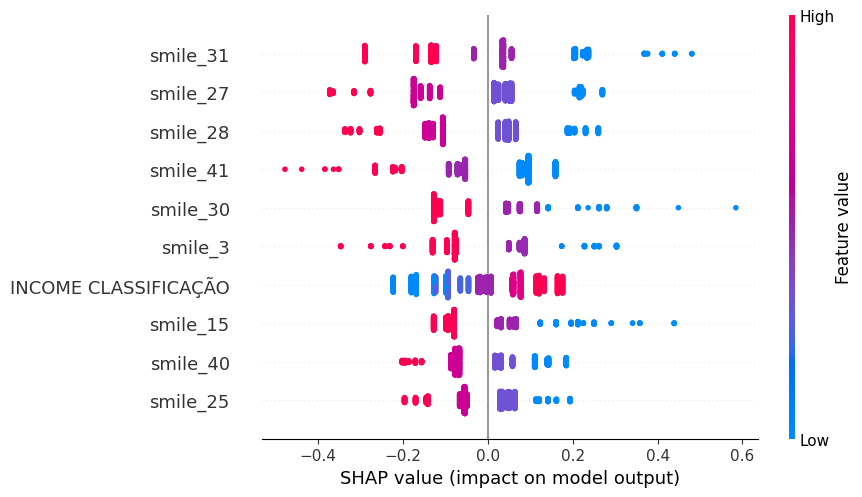

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender", "sexual_orientation", 
              'SEXO', 'race/ethnicity', 'student_accommodation', 'work', "country_code"]

def aggregate_features(feature_name):
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i, split in enumerate(splits):
    X_test = split['X_test'].copy()
    
    shap_vals = all_shap_values[i]
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()
X_test_agg_list = []

for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_all.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        # Get the argmax (original category index)
        argmax_values = X_test_all[group_cols].values.argmax(axis=1)
    
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_all[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_all[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_all.index
)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(expl, max_display=10, group_remaining_features=False)
plt.tight_layout()
plt.show()

/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_57653/1783194760.py:85: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()


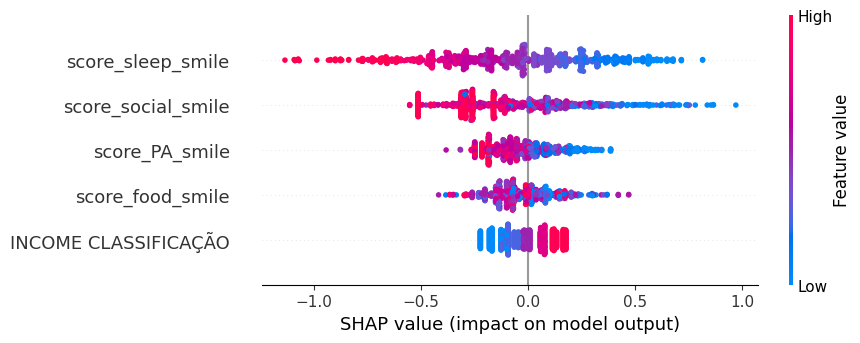

<Figure size 640x480 with 0 Axes>

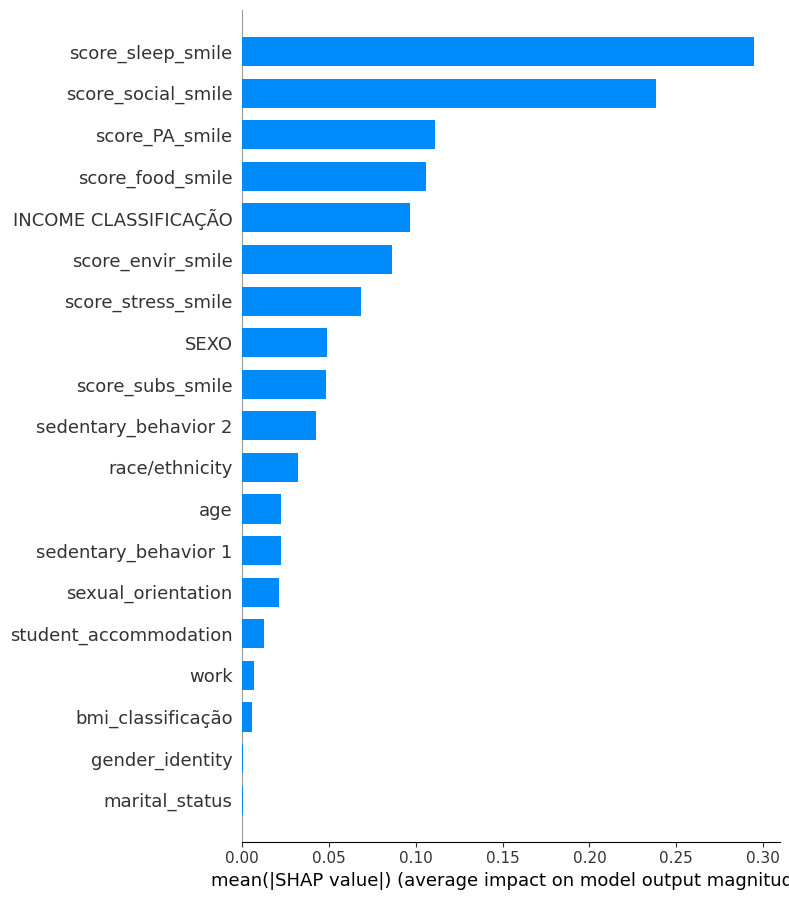

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'race/ethnicity', 'student_accommodation', 'work']  

smile_variable_groups = {
    "score_food_smile": [
        "smile_2", "smile_3", "smile_5"
    ],
    "score_subs_smile": [
        "smile_8", "smile_9", "smile_10", "smile_11"
    ],
    "score_PA_smile": [
        "smile_12", "smile_13", "smile_15"
    ],
    "score_stress_smile": [
        "smile_17", "smile_19"
    ],
    "score_sleep_smile": [
        "smile_25", "smile_27", "smile_28", "smile_41"
    ],
    "score_social_smile": [
        "smile_30", "smile_31", "smile_32", "smile_34", "smile_37"
    ],
    "score_envir_smile": [
        "smile_40", "smile_42", "smile_43"
    ]
}

feature_to_group_map = {}
for group_name, features in smile_variable_groups.items():
    for feature in features:
        feature_to_group_map[feature] = group_name

def aggregate_features(feature_name):
    if feature_name in feature_to_group_map:
        return feature_to_group_map[feature_name]
    
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i, split in enumerate(splits):
    X_test = split['X_test'].copy()
    
    shap_vals = all_shap_values[i]
    
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    if shap_array.shape[1] != len(X_test.columns):
        print(f"Aviso: Colunas SHAP ({shap_array.shape[1]}) != Colunas X_test ({len(X_test.columns)}).")
        try:
            X_test_reordered = X_test[all_feature_names]
            shap_df = pd.DataFrame(shap_array, columns=all_feature_names, index=X_test.index)
            X_test = X_test_reordered
        except Exception as e:
            print(f"Falha ao alinhar colunas. Pulando split {i}. Erro: {e}")
            continue
    else:
         shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)

    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()

X_test_agg_list = []
for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_all.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        argmax_values = X_test_all[group_cols].values.argmax(axis=1)
    
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_all[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_all[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_all.index
)

# Make gender_identity and sexual_orientation binary using stored indexes
if 'gender_identity' in X_test_agg.columns:
    X_test_agg['gender_identity'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

shap.plots.beeswarm(expl, max_display=5, group_remaining_features=False)
plt.tight_layout()
plt.show()
plt.close()

shap.summary_plot(
    shap_df_agg[common_columns].values, 
    X_test_agg[common_columns],
    plot_type="bar",
    feature_names=common_columns,
    show=False
)
plt.tight_layout()
plt.show()

SHAP - casos graves

Total de amostras: 915
Amostras GAD7 graves: 86


/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_57653/93474264.py:51: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()


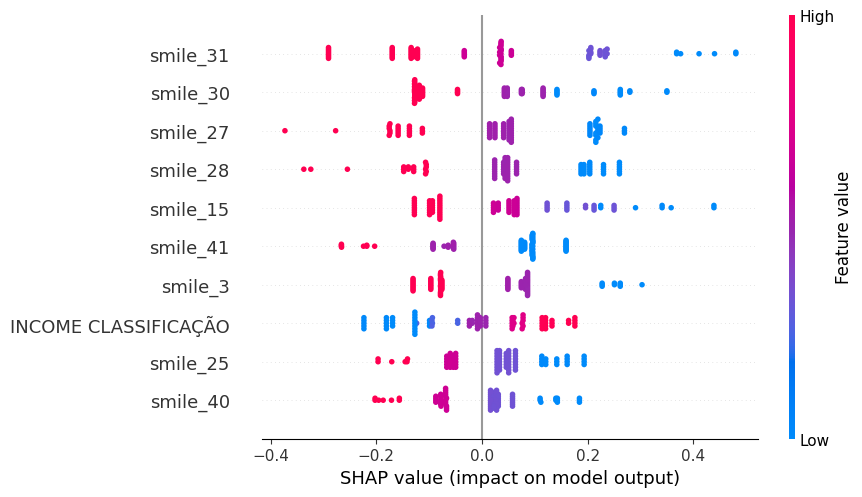

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'race/ethnicity', 'student_accommodation', 'work']

def aggregate_features(feature_name):
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i, split in enumerate(splits):
    X_test = split['X_test'].copy()
    
    shap_vals = all_shap_values[i]
    
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

# Filtra apenas casos graves de GAD7
severe_mask = shap_df_all.index.isin(severe_gad7_indexes)
shap_df_severe = shap_df_all.loc[severe_mask]
X_test_severe = X_test_all.loc[severe_mask]

print(f"Total de amostras: {len(shap_df_all)}")
print(f"Amostras GAD7 graves: {len(shap_df_severe)}")

shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()

X_test_agg_list = []
for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_severe.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        argmax_values = X_test_severe[group_cols].values.argmax(axis=1)
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_severe[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_severe[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_severe.index
)

if 'gender_identity' in X_test_agg.columns:
    X_test_agg['gender_identity'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

shap.plots.beeswarm(expl, max_display=10, group_remaining_features=False)
plt.tight_layout()
plt.show()

Total de amostras: 915
Amostras GAD7 graves: 86


/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_57653/2367383929.py:83: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()


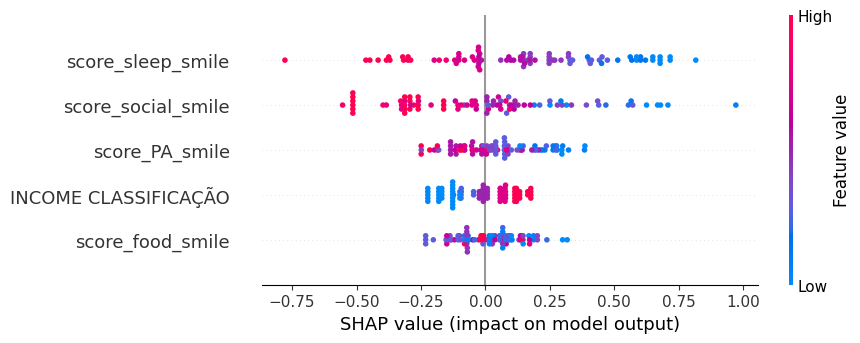

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender", "sexual_orientation", 
              'SEXO', 'race/ethnicity', 'student_accommodation', 'work', "country_code"]

smile_variable_groups = {
    "score_food_smile": [
        "smile_2", "smile_3", "smile_5", "score_food_smile"
    ],
    "score_subs_smile": [
        "smile_8", "smile_9", "smile_10", "smile_11", "score_subs_smile"
    ],
    "score_PA_smile": [
        "smile_12", "smile_13", "smile_15", "score_PA_smile"
    ],
    "score_stress_smile": [
        "smile_17", "smile_19", "score_stress_smile"
    ],
    "score_sleep_smile": [
        "smile_25", "smile_27", "smile_28", "smile_41", "score_sleep_smile"
    ],
    "score_social_smile": [
        "smile_30", "smile_31", "smile_32", "smile_34", "smile_37", "score_social_smile"
    ],
    "score_envir_smile": [
        "smile_40", "smile_42", "smile_43", "score_envir_smile"
    ]
}

feature_to_group_map = {}
for group_name, features in smile_variable_groups.items():
    for feature in features:
        feature_to_group_map[feature] = group_name

def aggregate_features(feature_name):
    if feature_name in feature_to_group_map:
        return feature_to_group_map[feature_name]
    
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i, split in enumerate(splits):
    X_test = split['X_test'].copy()
    
    shap_vals = all_shap_values[i]
    
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

# Filtra apenas casos graves de GAD7
severe_mask = shap_df_all.index.isin(severe_gad7_indexes)
shap_df_severe = shap_df_all.loc[severe_mask]
X_test_severe = X_test_all.loc[severe_mask]

print(f"Total de amostras: {len(shap_df_all)}")
print(f"Amostras GAD7 graves: {len(shap_df_severe)}")

shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()

X_test_agg_list = []
for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_severe.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        argmax_values = X_test_severe[group_cols].values.argmax(axis=1)
    
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_severe[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_severe[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_severe.index
)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

# Make gender_identity and sexual_orientation binary using stored indexes
if 'gender_identity' in X_test_agg.columns:
    X_test_agg['gender_identity'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)


expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(expl, max_display=5, group_remaining_features=False)
plt.tight_layout()
plt.show()
plt.close()